## Assignment 1 Mean-Variance Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.chdir(r'C:\Users\katya\Desktop\Courses\Term_2\QF600_Asset_Pricing\HomeWork')

data=pd.read_excel(r'Industry_Portfolios.xlsx',index_col=0, parse_dates=True)

In [2]:
mean = data.mean()
std = data.std()
cov = data.cov()
mean_std = pd.DataFrame([mean,std],index=['mean','standard deviation'])
print(mean_std.shape)
print(mean_std)

(2, 10)
                       NoDur     Durbl     Manuf     Enrgy     HiTec  \
mean                0.902833  0.733333  1.012833  1.231167  0.766250   
standard deviation  3.345657  8.361852  5.310270  6.081524  5.381191   

                       Telcm     Shops      Hlth     Utils     Other  
mean                0.881417  0.916333  0.783833  0.907167  0.489083  
standard deviation  4.448284  4.093786  3.787172  3.701763  5.582452  


In [3]:
#Minimum-Variance Frontier without riskless assets
ind_return=np.array(mean_std.loc['mean'])  
e_t=np.array([1]*10)
e=e_t.T
v=np.array(cov) 
v_inv=np.linalg.inv(v) 
delta=(e_t)@v_inv@e 
zeta=(ind_return.T)@v_inv@ind_return
alpha=(ind_return.T)@v_inv@e
rmv=alpha/delta
Rp_1=np.linspace(0,rmv,100)
Sp_1=np.sqrt(1/delta+delta/(zeta*delta-alpha**2)*(Rp_1-alpha/delta)**2)
Rp_2=np.linspace(rmv,2,100)
Sp_2=np.sqrt(1/delta+delta/(zeta*delta-alpha**2)*(Rp_2-alpha/delta)**2)

In [4]:
#Minimum-Variance Frontier with riskless assets
Rf=0.13
Rp_f=np.linspace(Rf,2,100)
Sp_f=(Rp_f-Rf)/(zeta-2*alpha*Rf+delta*Rf**2)**0.5

In [5]:
#Tangency portfolio and weights
R_tg=(alpha*Rf-zeta)/(delta*Rf-alpha)
Sp_tg=(R_tg-Rf)/(zeta-2*alpha*Rf+delta*Rf**2)**0.5
lambda_tg=(R_tg-Rf)/(zeta-2*alpha*Rf-delta*Rf**2)
weights=[lambda_tg*v_inv@(ind_return-Rf*e)]
print(weights)
print([Sp_tg,R_tg])

[array([ 0.5846418 , -0.22035549,  0.73506365,  0.10714208, -0.37410485,
       -0.09826505,  1.02075104,  0.07778813,  0.13653632, -0.93984827])]
[3.360726330566364, 1.4862735358446901]


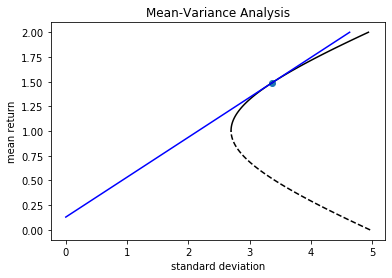

In [6]:
#plot
fig,ax=plt.subplots()
plt.plot(Sp_1,Rp_1,'k--')
plt.plot(Sp_2,Rp_2,'k-')
plt.plot(Sp_f,Rp_f,'b-')
plt.scatter(Sp_tg,R_tg)
plt.title('Mean-Variance Analysis')
plt.xlabel('standard deviation')
plt.ylabel('mean return')
plt.show()

## Assignment 2 Linear Factor Models

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
data2=pd.read_excel(r'Market_Portfolio.xlsx',index_col=0,parse_dates=True)
data2['Rf']=0.13

In [9]:
#regress monthly excess return of 10 industry on market return
alpha=[]
beta=[]
for i in range(10):
    x=np.array(data2.iloc[:,0]-data2.iloc[:,1]).reshape((-1,1))  #x=rm-rf
    y=np.array(data.iloc[:,i]-data2.iloc[:,1])  #y=ri-rf
    model1=LinearRegression().fit(x,y)
    alpha.append(model1.intercept_)
    beta.append(model1.coef_[0])

coefficient_table=pd.DataFrame([alpha,beta],index=['intercept','slope'],columns=data.columns)
print(coefficient_table)

              NoDur     Durbl     Manuf     Enrgy     HiTec     Telcm  \
intercept  0.369443 -0.415599  0.159771  0.501719 -0.064020  0.194691   
slope      0.652647  1.648536  1.169846  0.969850  1.132969  0.900729   

              Shops      Hlth     Utils     Other  
intercept  0.275492  0.237841  0.444585 -0.387135  
slope      0.826492  0.673036  0.538086  1.207309  


In [10]:
# regress mean returns of 10 industries on betas of 10 industries
# to obtain intercept and coefficient of SML

beta.append(1)  
print(beta)  # 11 beta

data.loc['mean']=np.mean(data)
data2.loc['mktmean']=np.mean(data2)
return_SML=data.loc['mean']
return_SML['mktmean']=data2.iloc[-1,0]
print(return_SML)  # 11 return

for j in range(11):
    x2=np.array(beta).reshape((-1,1))  # beta
    y2=np.array(return_SML)  # mean of 10 industries respectively
    model2=LinearRegression().fit(x2,y2)
print(model2.intercept_, model2.coef_[0])

[0.6526473559635406, 1.6485356499666464, 1.1698462964148775, 0.969849956464005, 1.1329694391423122, 0.9007292509476114, 0.8264924015201595, 0.6730356956329141, 0.5380861001316396, 1.2073094586151096, 1]
NoDur      0.902833
Durbl      0.733333
Manuf      1.012833
Enrgy      1.231167
HiTec      0.766250
Telcm      0.881417
Shops      0.916333
Hlth       0.783833
Utils      0.907167
Other      0.489083
mktmean    0.748083
Name: mean, dtype: float64
1.0327683682657058 -0.18546745836573275


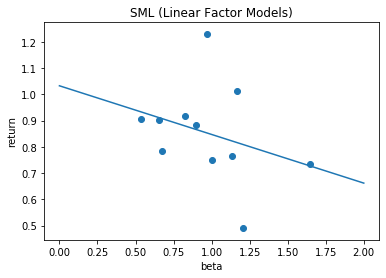

In [11]:
#plot SML & mean returns of 10 industries
fig,ax=plt.subplots()
x_axis=np.linspace(0,2,100)
y_axis=model2.intercept_+model2.coef_[0]*x_axis
plt.plot(x_axis,y_axis)
plt.scatter(beta,return_SML)
plt.title('SML (Linear Factor Models)')
plt.xlabel('beta')
plt.ylabel('return')
plt.show()

## Assignment 3 Stock Valuation

### Part 1: Performance Measurement

In [12]:
# re-import excel to DataFrame
data4=pd.read_excel(r'Industry_Portfolios.xlsx',sheet_name='Sheet1',index_col=0,parse_dates=True)
data5=pd.read_excel(r'Market_Portfolio.xlsx',sheet_name='Sheet1',index_col=0,parse_dates=True)
data6=pd.read_excel(r'Risk_Factors.xlsx',sheet_name='Sheet1',index_col=0,parse_dates=True)

In [15]:
# calculate Sharpe ratio
sharpe_ratio=[]
for i in range(10):
    sharpe_ratio.append((np.mean(data4.iloc[:,i]-data6.iloc[:,0])
                        )/np.std(data4.iloc[:,i]-data6.iloc[:,0],ddof=1))
# default ddof=0 (population stdev); ddof=1 (sample stdev)
print(sharpe_ratio)

[0.23109875665668114, 0.07235564226609825, 0.16661646327503998, 0.18170845737762228, 0.11855246797085117, 0.16906436653763007, 0.191753361104748, 0.17252946391618662, 0.21094772703547932, 0.06469291679365406]


In [37]:
# calculate Sortino ratio

#calculate SV of Ri-Rf
length=data4.shape[0]
ri_rf=data4-data6.iloc[:,0].values.reshape(length,1)  
ri_rf_mean=list(np.mean(ri_rf))
SV=[]
for i in range(10):
    sum1=0   
    for j in range(length):
        if ri_rf.iloc[j,i]>=0:  
            sum1+=0
        else:
            sum1+=(ri_rf.iloc[j,i])**2
    sv_res=np.sqrt(sum1/(length-0))
    SV.append(sv_res)    
# can be more simple by: ri_rf[ri_rf<0]**2.mean()**0.5
    
sortino_ratio=[]
for k in range(10):
    sortino_ratio.append(ri_rf_mean[k]/SV[k])
print(sortino_ratio)

[0.3508041482772445, 0.11196655832234695, 0.2412596807864076, 0.2736116179717164, 0.17062041712373727, 0.2449399654741521, 0.29303151810784067, 0.2702939204941118, 0.29004356542348525, 0.0873509467389702]


In [54]:
# simple linear regression to regress Jensen's alpha
Jalpha=[]
for i in range(10):
    x1=np.array(data6.iloc[:,1]).reshape((-1,1))
    y1=np.array(ri_rf.iloc[:,i])
    model1=LinearRegression().fit(x1,y1)
    Jalpha.append(model1.intercept_)
print(Jalpha)

# multiple linear regression to regress three-factor alpha
three_alpha=[]
x2=[]
for i in range(120):
    x2.append([data6.iloc[i,1],data6.iloc[i,2],data6.iloc[i,3]])  
for j in range(10):
    x2=np.array(x2)   #attn:multiple cannot reshape!
    y2=np.array(ri_rf.iloc[:,j])
    model2=LinearRegression().fit(x2,y2)
    three_alpha.append(model2.intercept_)
print(three_alpha)

[0.3697174760659971, -0.4179031409666244, 0.16049430874023518, 0.5044851549226064, -0.064023591590737, 0.1943480278770583, 0.27409257933411535, 0.236968073082639, 0.44652339944723757, -0.38750777028459815]
[0.38670448576261746, -0.47434182900043387, 0.15328459357527657, 0.5230069868911486, -0.06597942391258194, 0.20072402259738797, 0.2559410668853671, 0.25747232214033494, 0.47441058218313287, -0.4044115289082427]


In [62]:
performance=pd.DataFrame([sharpe_ratio, sortino_ratio, Jalpha, three_alpha],
                         index=['Sharpe ratio','Sortino ratio','Jensen alpha','Three-factor alpha'],
                        columns=data4.columns)
print(performance)

                       NoDur     Durbl     Manuf     Enrgy     HiTec  \
Sharpe ratio        0.231099  0.072356  0.166616  0.181708  0.118552   
Sortino ratio       0.350804  0.111967  0.241260  0.273612  0.170620   
Jensen alpha        0.369717 -0.417903  0.160494  0.504485 -0.064024   
Three-factor alpha  0.386704 -0.474342  0.153285  0.523007 -0.065979   

                       Telcm     Shops      Hlth     Utils     Other  
Sharpe ratio        0.169064  0.191753  0.172529  0.210948  0.064693  
Sortino ratio       0.244940  0.293032  0.270294  0.290044  0.087351  
Jensen alpha        0.194348  0.274093  0.236968  0.446523 -0.387508  
Three-factor alpha  0.200724  0.255941  0.257472  0.474411 -0.404412  


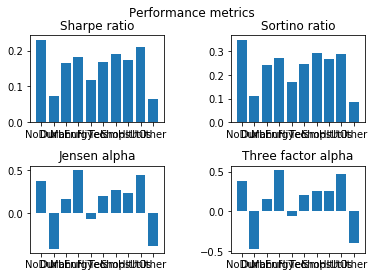

In [89]:
# plot bar chart
fig,ax=plt.subplots(2,2)
ax[0,0].bar(range(len(sharpe_ratio)),sharpe_ratio,tick_label=data4.columns)
ax[0,0].set_title('Sharpe ratio')
ax[0,1].bar(range(len(sortino_ratio)),sortino_ratio,tick_label=data4.columns)
ax[0,1].set_title('Sortino ratio')
ax[1,0].bar(range(len(Jalpha)),Jalpha,tick_label=data4.columns)
ax[1,0].set_title('Jensen alpha')
ax[1,1].bar(range(len(three_alpha)),three_alpha,tick_label=data4.columns)
ax[1,1].set_title('Three factor alpha')
fig.suptitle('Performance metrics')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

### Part 2: Minimum-variance frontier

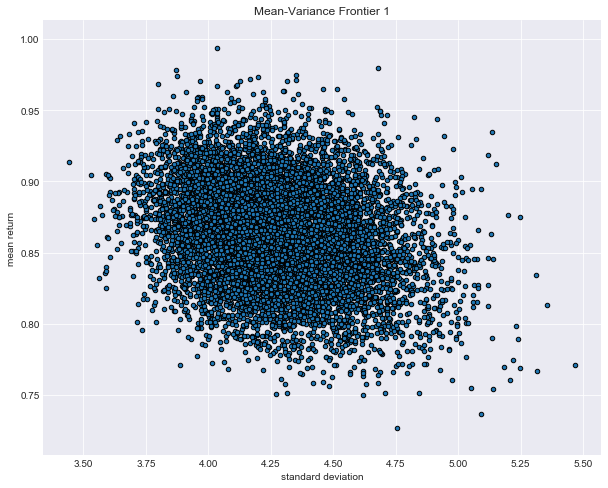

In [97]:
#element w situation
port_return1=[]
port_vol1=[]
for f in range(10000):
    weight1=np.random.uniform(0,1,10)
    weight1 /= np.sum(weight1)
    return1=np.dot(weight1,np.mean(data4))  
    vol1=np.sqrt(np.dot(weight1.T,np.dot(data4.cov(),weight1)))
    port_return1.append(return1)
    port_vol1.append(vol1)
portfolio1={'port_return1':port_return1,'port_vol1':port_vol1}
df1=pd.DataFrame(portfolio1)

df1.plot.scatter(x='port_vol1',y='port_return1', edgecolors='black', figsize=(10, 8), grid=True)
plt.style.use('seaborn-dark')
plt.title('Mean-Variance Frontier 1')
plt.xlabel('standard deviation')
plt.ylabel('mean return')
plt.show()

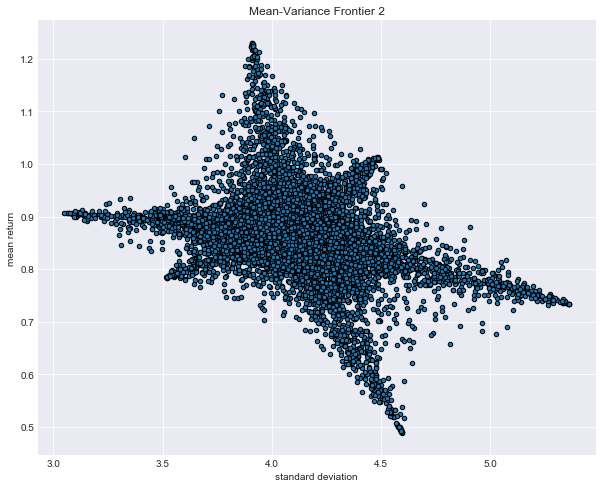

In [100]:
#element 1/w situation
port_return2=[]
port_vol2=[]
for g in range(10000):
    weight2=np.random.uniform(0,1,10)
    weight2 = 1/weight2
    weight2 /= np.sum(weight2)
    return2=np.dot(weight2,np.mean(data4))  
    vol2=np.sqrt(np.dot(weight2.T,np.dot(data4.cov(),weight1)))
    port_return2.append(return2)
    port_vol2.append(vol2)
portfolio2={'port_return2':port_return2,'port_vol2':port_vol2}
df2=pd.DataFrame(portfolio2)

df2.plot.scatter(x='port_vol2',y='port_return2', edgecolors='black', figsize=(10, 8), grid=True)
plt.style.use('seaborn-dark')
plt.title('Mean-Variance Frontier 2')
plt.xlabel('standard deviation')
plt.ylabel('mean return')
plt.show()

## Assignment4 Multi-Period Asset Pricing

In [107]:
#simulate epsilon & nu
np.random.seed(1)
ep=np.random.normal(0,1,1000)
nu=np.array([np.log(0.65) if x<0.017 else 0 for x in np.random.uniform(0,1,1000)])
g=np.exp(0.02+0.02*ep+nu)

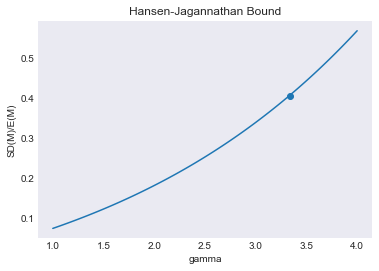

In [108]:
# PART 1: HANSEN-JAGANNATHAN BOUND
# calculate SD/E
M=[]
for gamma in np.linspace(1,4,100): # generate 100 gamma within [1,4]
    z=np.std([0.99*a**(-gamma) for a in g])/np.mean([0.99*a**(-gamma) for a in g])
    M.append(z)

#find the smallest gamma
f=zip(list(np.linspace(1,4,100)),M)
min_gamma=min([q[0] for q in f if q[1]>0.4])  

#plot
plt.plot(np.linspace(1,4,100),M)
plt.scatter(min_gamma,np.std([0.99*t**-min_gamma for t in g])/np.mean([0.99*t**-min_gamma for t in g]))
plt.title('Hansen-Jagannathan Bound')
plt.xlabel('gamma')
plt.ylabel('SD(M)/E(M)')
plt.show()

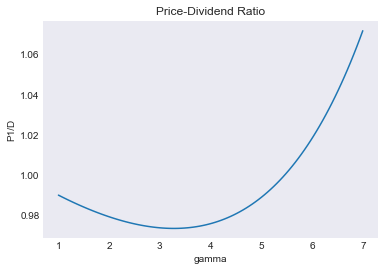

In [109]:
# PART 2: PRICE-DIVIDEND RATIO
P1D=[]
for gamma2 in np.linspace(1,7,100):
    P1D.append(np.mean([0.99*b**(1-gamma2) for b in g]))
plt.plot(np.linspace(1,7,100),P1D)
plt.title('Price-Dividend Ratio')
plt.xlabel('gamma')
plt.ylabel('P1/D')
plt.show()

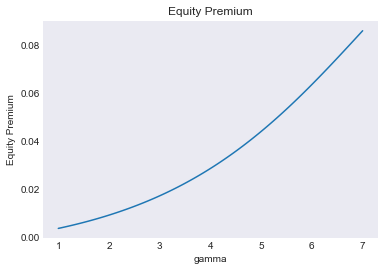

In [110]:
# PART 3: EQUITY PREMIUM
mean_g=np.mean(g)
Rm=[1/c*mean_g for c in P1D]
Rf=[]
for gamma4 in np.linspace(1,7,100):
    Rf.append(1/np.mean([0.99*d**(-gamma4) for d in g]))
premium=[Rm[i]-Rf[i] for i in range(100)]
plt.plot(np.linspace(1,7,100),premium)
plt.title('Equity Premium')
plt.xlabel('gamma')
plt.ylabel('Equity Premium')
plt.show()

## Assignment5: Behavioral Finance

In [111]:
#get 1000 g
np.random.seed(1)
ep=np.random.normal(0,1,1000)
g=np.exp(0.02+0.02*ep)

def v(R):
    if R>=1.0303:
        return R-1.0303
    else:
        return 2*(R-1.0303)

def e(b0,x):
    vlist=np.mean([v(x*i) for i in g])
    return 0.99*b0*vlist+0.99*x-1

def bisection(a,b,b0):
    x=(a+b)/2
    if (abs(e(b0,x))<10**(-4)):
        return x
    elif e(b0,x)<0:
        a=x
        return bisection(a,b,b0)
    elif e(b0,x)>0:
        b=x
        return bisection(a,b,b0)

a=1
b=1.1
b0_range=np.linspace(0,10,200)
xlist=[bisection(a,b,b0) for b0 in b0_range]
PD=1/(np.array(xlist)-1)

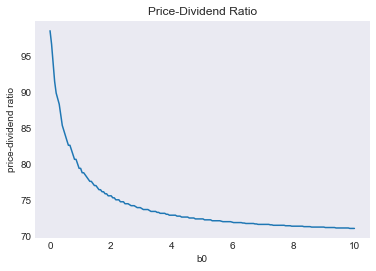

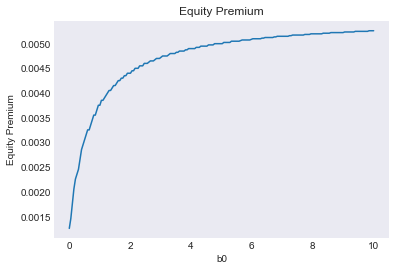

In [112]:
#plot price-dividend ratio
plt.plot(b0_range,PD)  
plt.title('Price-Dividend Ratio')
plt.xlabel('b0')
plt.ylabel('price-dividend ratio')
plt.show()

#plot equity premium
Rm=np.array([np.mean([m*n for n in g]) for m in xlist])
ep=Rm-1.0303
plt.plot(b0_range,ep)  
plt.title('Equity Premium')
plt.xlabel('b0')
plt.ylabel('Equity Premium')
plt.show()